|  Column name  |  Description  |
| ----- | ------- |
| Num_posts        | Number of total posts that the user has ever posted   |
| Num_following    | Number of following                                   |
| Num_followers    | Number of followers                                   |
| Biography_length | Length (number of characters) of the user's biography |
| Picture_availability | Value 0 if the user has no profile picture, or 1 if has |
| Link_availability| Value 0 if the user has no external URL, or 1 if has |
| Average_caption_length | The average number of character of captions in media |
| Caption_zero     | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length |
| Non_image_percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel
| Engagement_rate_like | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)
| Engagement_rate_comment | Similar to ER like, but it is for comments |
| Location_tag_percentage | Percentage (0.0 to 1.0) of posts tagged with location |
| Average_hashtag_count   | Average number of hashtags used in a post |
| Promotional_keywords | Average use of promotional keywords in hashtag, i.e. regrann, contest, repost, giveaway, mention, share, give away, quiz |
| Followers_keywords | Average use of followers hunter keywords in hashtag, i.e. follow, like, folback, follback, f4f|
| Cosine_similarity  | Average cosine similarity of between all pair of two posts a user has |
| Post_interval      | Average interval between posts (in hours) |
| real_fake          | r (real/authentic user), f (fake user/bought followers) |

# Q1: Import labraries

In [145]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Q2: Read instagram_users.csv file

In [146]:
# write your code here ^_^
insta = pd.read_csv('instagram_users.csv')
insta

,Num_posts,Num_following,Num_followers,Biography_length,Picture_availability,Link_availability,Average_caption_length,Caption_zero,Non_image_percentage,Engagement_rate_like,Engagement_rate_comment,Location_tag_percentage,Average_hashtag_count,Promotional_keywords,Followers_keywords,Cosine_similarity,Post_interval,real_fake
0,44,48,325,33,1,0,12,0.000000,0.000,0.000000,0.00,0.000,0.000,0.0,0.000,0.111111,0.094985,fake
1,10,66,321,150,1,0,213,0.000000,1.000,14.390000,1.97,0.000,1.500,0.0,0.000,0.206826,230.412857,fake
2,33,970,308,101,1,1,436,0.000000,1.000,10.100000,0.30,0.000,2.500,0.0,0.056,0.572174,43.569939,fake
3,70,86,360,14,1,0,0,1.000000,0.000,0.780000,0.06,0.000,0.000,0.0,0.000,1.000000,5.859799,fake
4,3,21,285,73,1,0,93,0.000000,0.000,14.290000,0.00,0.667,0.000,0.0,0.000,0.300494,0.126019,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64239,13,145,642,0,1,0,7,0.461538,0.000,14.270000,0.58,0.000,0.077,0.0,0.000,0.192308,1745.291260,real
64240,652,3000,1300,146,1,1,384,0.000000,0.389,8.520000,0.13,0.000,1.611,0.0,0.000,0.169917,54.629120,real
64241,1500,3700,3200,147,1,1,129,0.000000,0.111,9.390000,0.31,0.722,0.000,0.0,0.056,0.058908,129.802048,real
64242,329,1500,1800,218,1,1,290,0.055556,0.000,6.350000,0.26,0.222,0.500,0.0,0.000,0.103174,53.402840,real


In [147]:
insta.columns

Index([' Num_posts', 'Num_following', 'Num_followers', 'Biography_length',
       'Picture_availability', 'Link_availability', 'Average_caption_length',
       'Caption_zero', 'Non_image_percentage', 'Engagement_rate_like',
       'Engagement_rate_comment', 'Location_tag_percentage',
       'Average_hashtag_count', 'Promotional_keywords', 'Followers_keywords',
       'Cosine_similarity', 'Post_interval', 'real_fake'],
      dtype='object')

In [148]:

X = insta.drop('real_fake',axis=1)
y = insta['real_fake']
#-----
#X1 = insta.drop('Cosine_similarity',axis=1)
#y2 = insta['Cosine_similarity']
#------
#X3 = insta.drop('Post_interval',axis=1)
#y3 = insta['Post_interval']

# Q3: Split tha dataset into training and testing

In [149]:
# write your code here ^_^

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=0.4, random_state=101)


In [150]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()


In [151]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [152]:
# Q4: Build three machine models 

## Q4.1: The first machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [153]:
#confusion matrix.
predictions = dtree.predict(X_test)


In [154]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [155]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

        fake       0.84      0.86      0.85     12760
        real       0.86      0.84      0.85     12938

    accuracy                           0.85     25698
   macro avg       0.85      0.85      0.85     25698
weighted avg       0.85      0.85      0.85     25698



In [156]:
print(accuracy_score(y_test,predictions))

0.8483539575064207


In [157]:
print(confusion_matrix(y_test,predictions))

[[10930  1830]
 [ 2067 10871]]


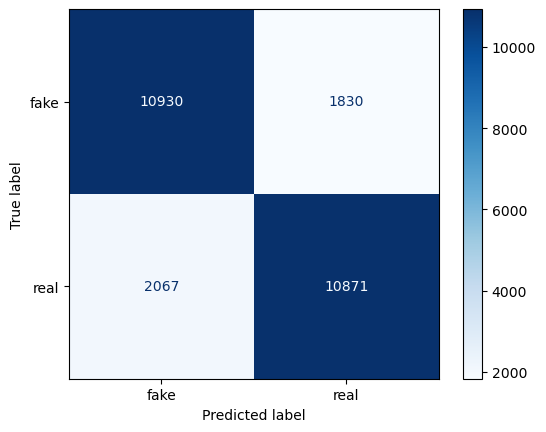

In [158]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtree, X_test, y_test,cmap='Blues')  
plt.show()

## Q4.2: The second machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [159]:
## Random Forests

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100) #n_estimators: The number of trees in the forest.
rfc.fit(X_train, y_train)


RandomForestClassifier()

In [160]:
print(classification_report(y_test,rfc_pred))


              precision    recall  f1-score   support

        fake       0.95      0.84      0.89     12760
        real       0.86      0.95      0.90     12938

    accuracy                           0.90     25698
   macro avg       0.90      0.90      0.90     25698
weighted avg       0.90      0.90      0.90     25698



In [161]:
print("Accuracy:",accuracy_score(y_test,predictions))

Accuracy: 0.8483539575064207


In [162]:
rfc_pred = rfc.predict(X_test)

In [163]:
print(confusion_matrix(y_test,rfc_pred))

[[10698  2062]
 [  601 12337]]


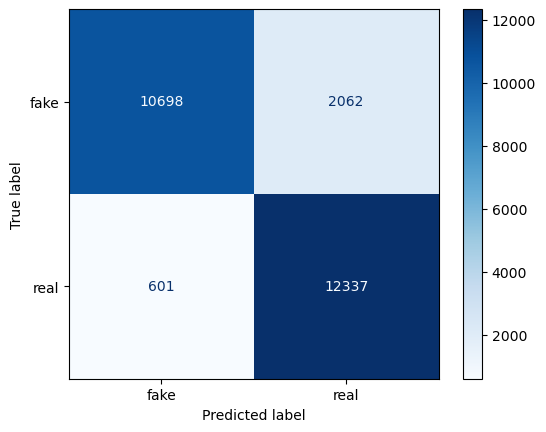

In [164]:
plot_confusion_matrix(rfc, X_test, y_test,cmap='Blues')  
plt.show()

## Q4.3: The third machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [165]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc=dtc.fit(X_train, y_train)


y_pred = dtc.predict(X_test)

In [166]:
print("Accuracy:",accuracy_score(y_test, y_pred))


Accuracy: 0.8486263522453109


In [167]:

print(tree.export_text(dtc))

|--- feature_5 <= 0.50
|   |--- feature_10 <= 0.45
|   |   |--- class: fake
|   |--- feature_10 >  0.45
|   |   |--- feature_2 <= 4850.00
|   |   |   |--- feature_9 <= 7.01
|   |   |   |   |--- class: fake
|   |   |   |--- feature_9 >  7.01
|   |   |   |   |--- feature_11 <= 0.01
|   |   |   |   |   |--- feature_13 <= 0.16
|   |   |   |   |   |   |--- feature_2 <= 487.50
|   |   |   |   |   |   |   |--- feature_1 <= 62.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 116.50
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 71.50
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 32.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  32.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |--- feature_2 >  71.50
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 27.50
|   |   |   |   |   |   |   |   |   |   |   |--- tr

In [ ]:
tree.plot_tree(dtc)
plt.show()